In [345]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [346]:
dataset=pd.read_csv('Train.csv')

In [347]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [348]:
dataset.shape

(8523, 12)

In [349]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [350]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Categorical features:

- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type





In [351]:
dataset['Item_Weight']=dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean())

In [352]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [353]:
mode_outlet_size=dataset.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [354]:
print(mode_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [355]:
dataset.loc[dataset['Outlet_Size'].isnull(),'Outlet_Size']=dataset.loc[dataset['Outlet_Size'].isnull(),'Outlet_Type'].apply(lambda x:mode_outlet_size[x])

In [356]:
dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [357]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [358]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [359]:
sns.set()

<ipython-input-360-c8d379d48a40>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Item_Weight'])


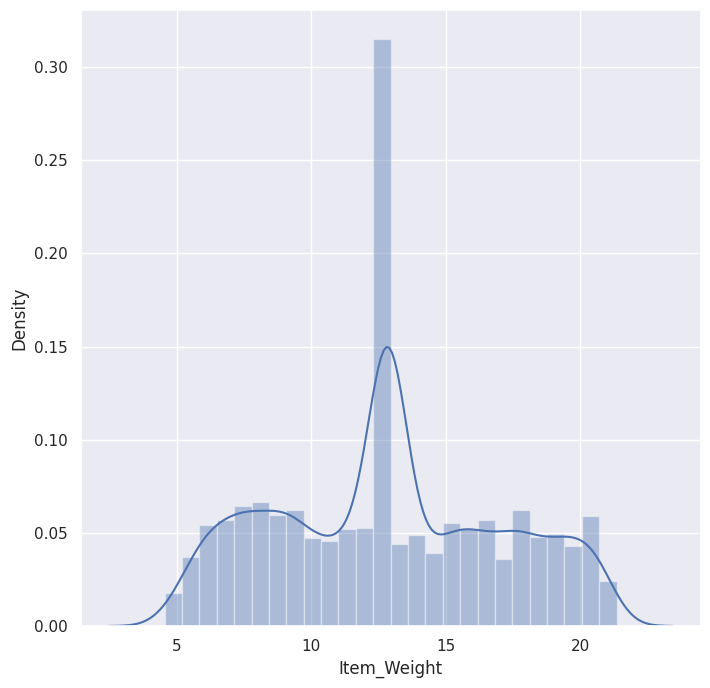

In [360]:
plt.figure(figsize=(8,8))
sns.distplot(dataset['Item_Weight'])
plt.show()

<ipython-input-361-10d00fffa464>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Item_Visibility'])


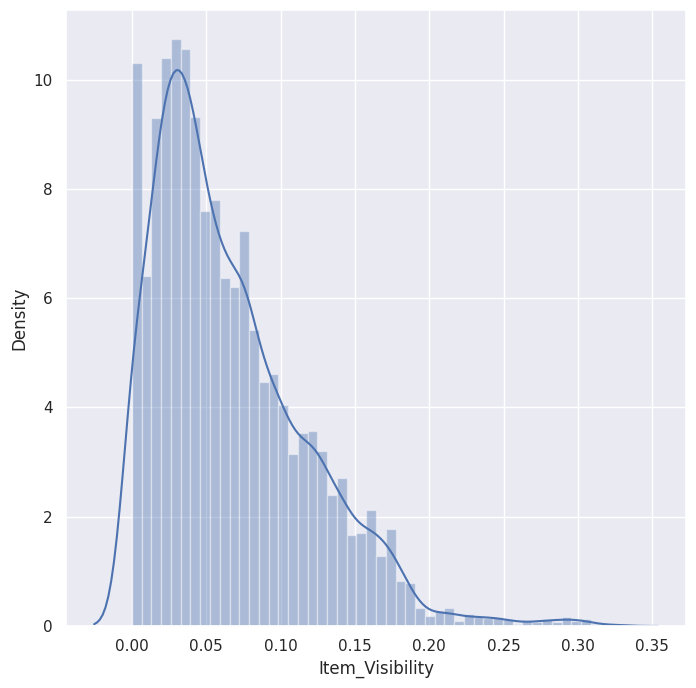

In [361]:
plt.figure(figsize=(8,8))
sns.distplot(dataset['Item_Visibility'])
plt.show()

<ipython-input-362-9d9b5486e374>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Item_MRP'])


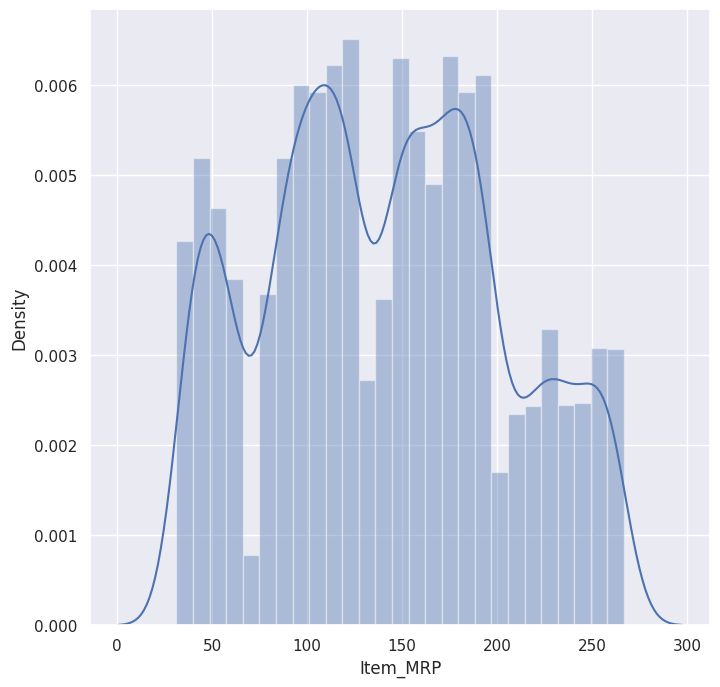

In [362]:
plt.figure(figsize=(8,8))
sns.distplot(dataset['Item_MRP'])
plt.show()

<ipython-input-363-e80c7d496427>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Outlet_Establishment_Year'])


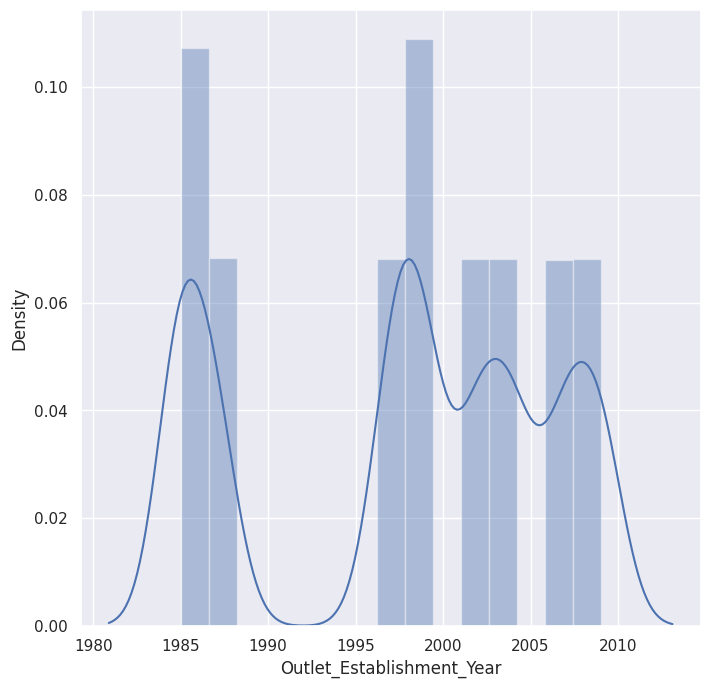

In [363]:
plt.figure(figsize=(8,8))
sns.distplot(dataset['Outlet_Establishment_Year'])
plt.show()

<ipython-input-364-282ae9b86f81>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Item_Outlet_Sales'])


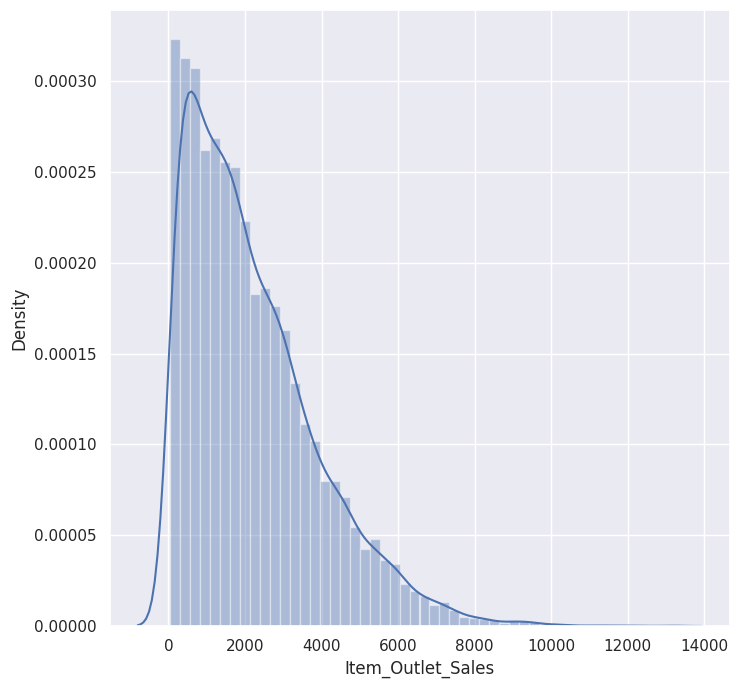

In [364]:
plt.figure(figsize=(8,8))
sns.distplot(dataset['Item_Outlet_Sales'])
plt.show()

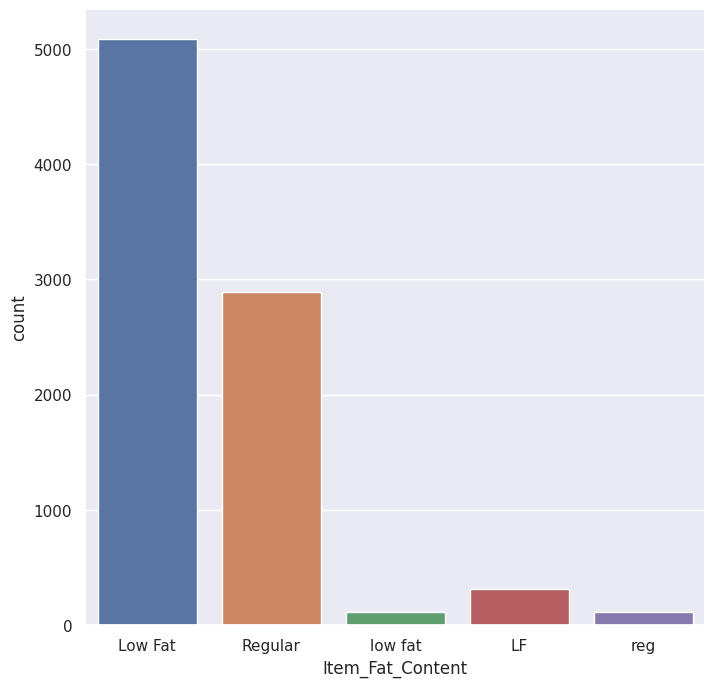

In [365]:
plt.figure(figsize=(8,8))
sns.countplot(x='Item_Fat_Content',data=dataset)
plt.show()

In [366]:
dataset.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

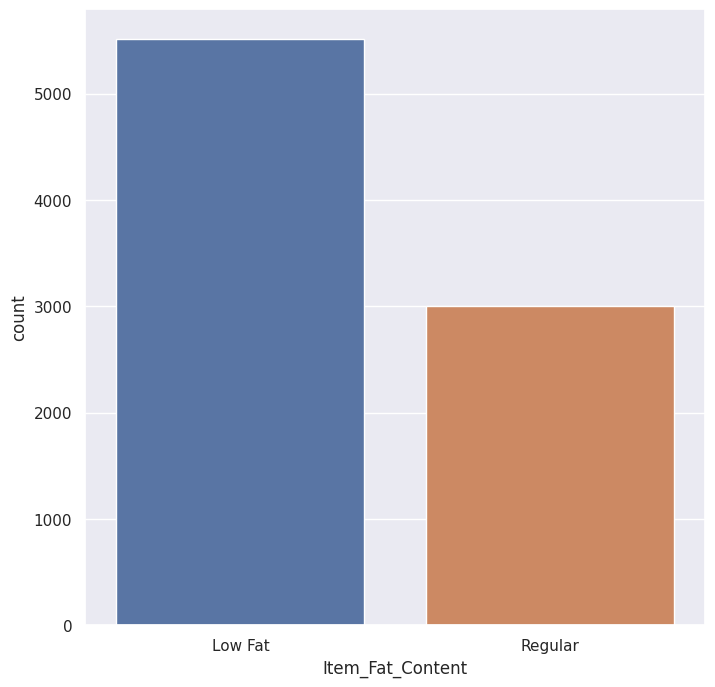

In [367]:
plt.figure(figsize=(8,8))
sns.countplot(x='Item_Fat_Content',data=dataset)
plt.show()

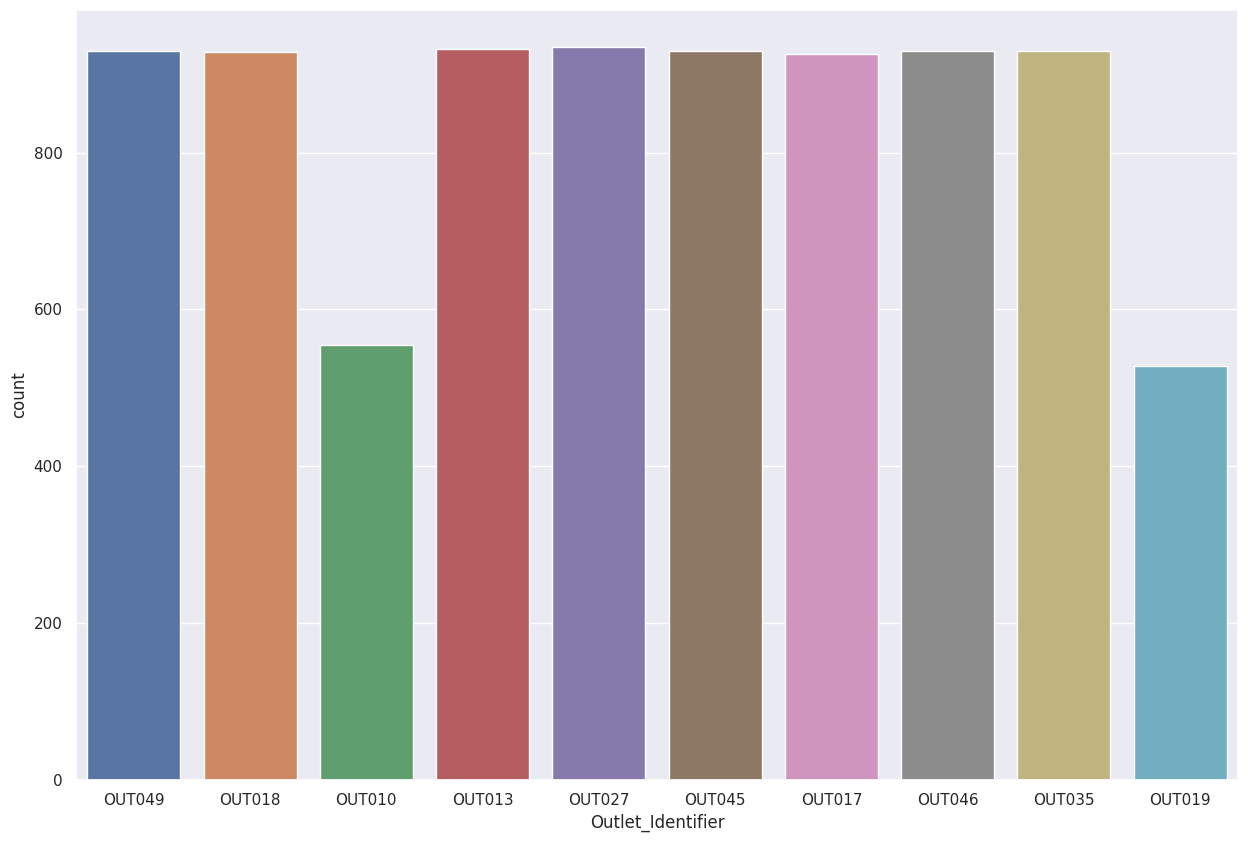

In [368]:
plt.figure(figsize=(15,10))
sns.countplot(x='Outlet_Identifier',data=dataset)
plt.show()

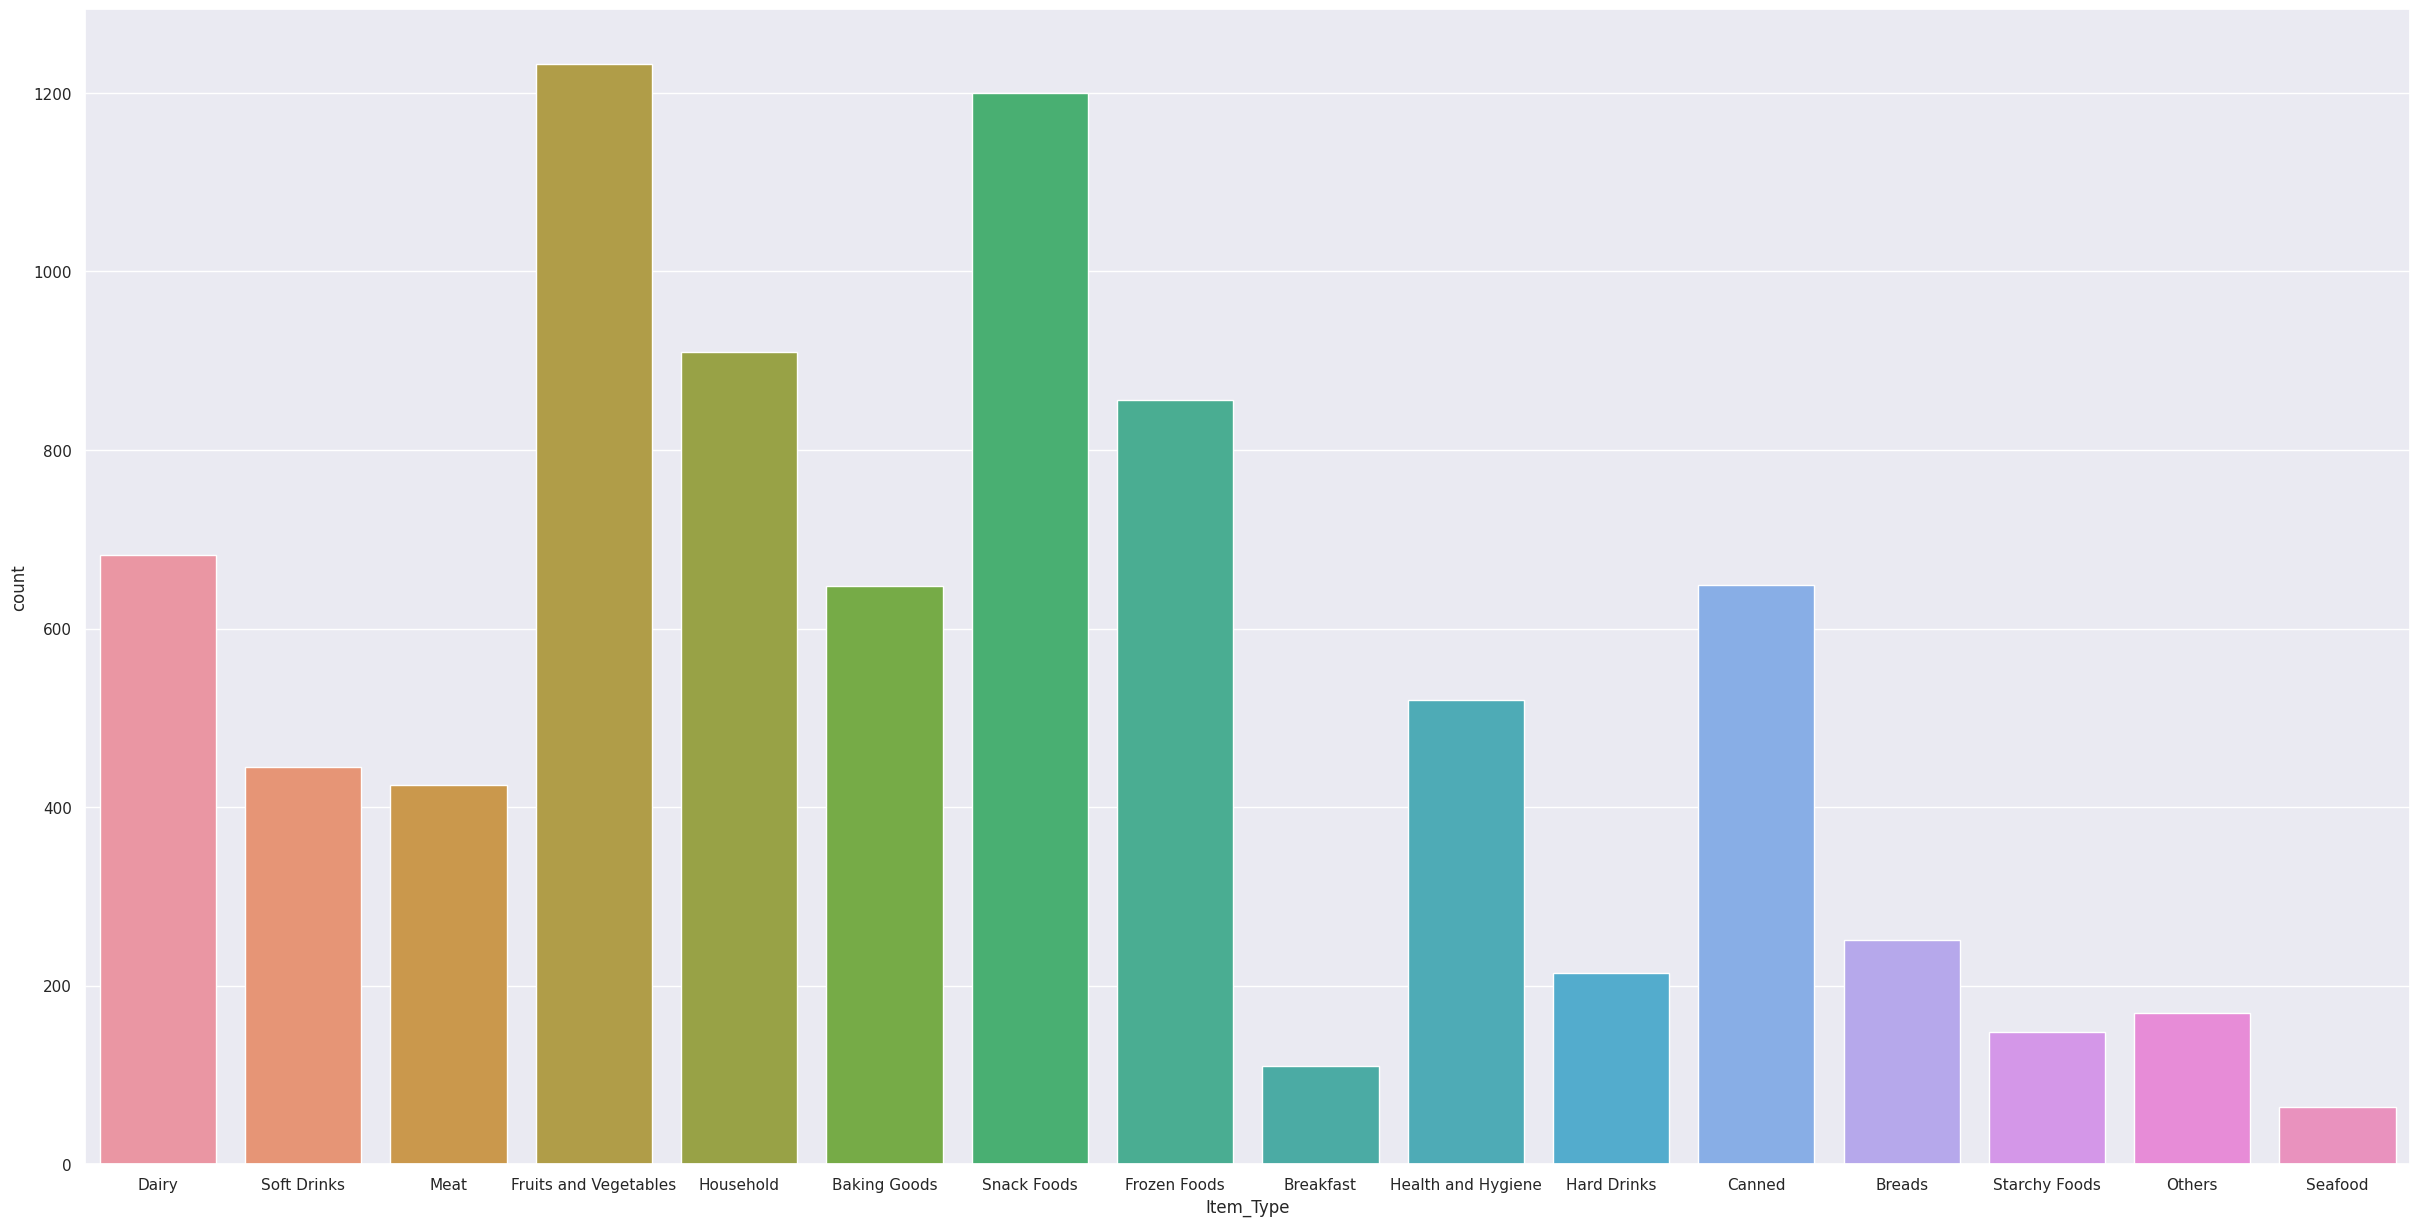

In [369]:
plt.figure(figsize=(30,15))
sns.countplot(x='Item_Type',data=dataset)
plt.show()

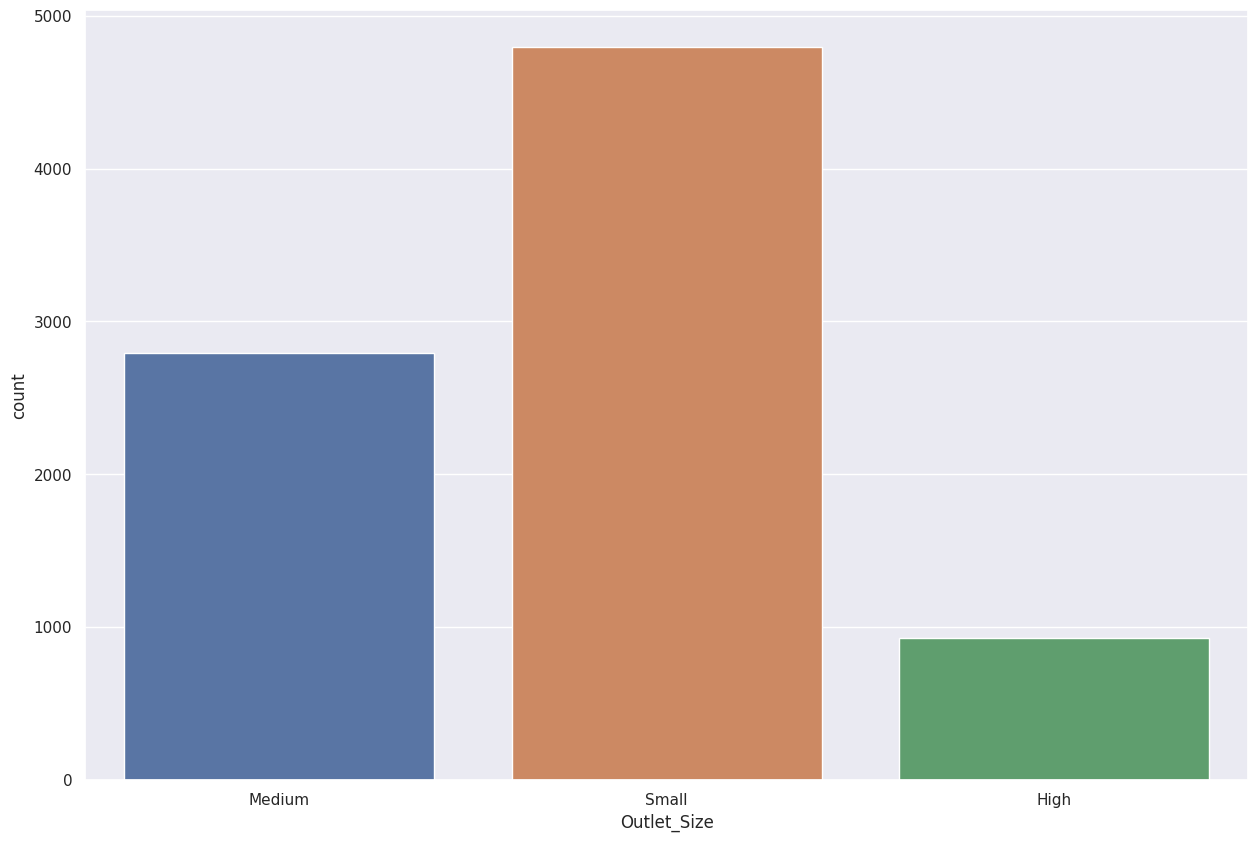

In [370]:
plt.figure(figsize=(15,10))
sns.countplot(x='Outlet_Size',data=dataset)
plt.show()

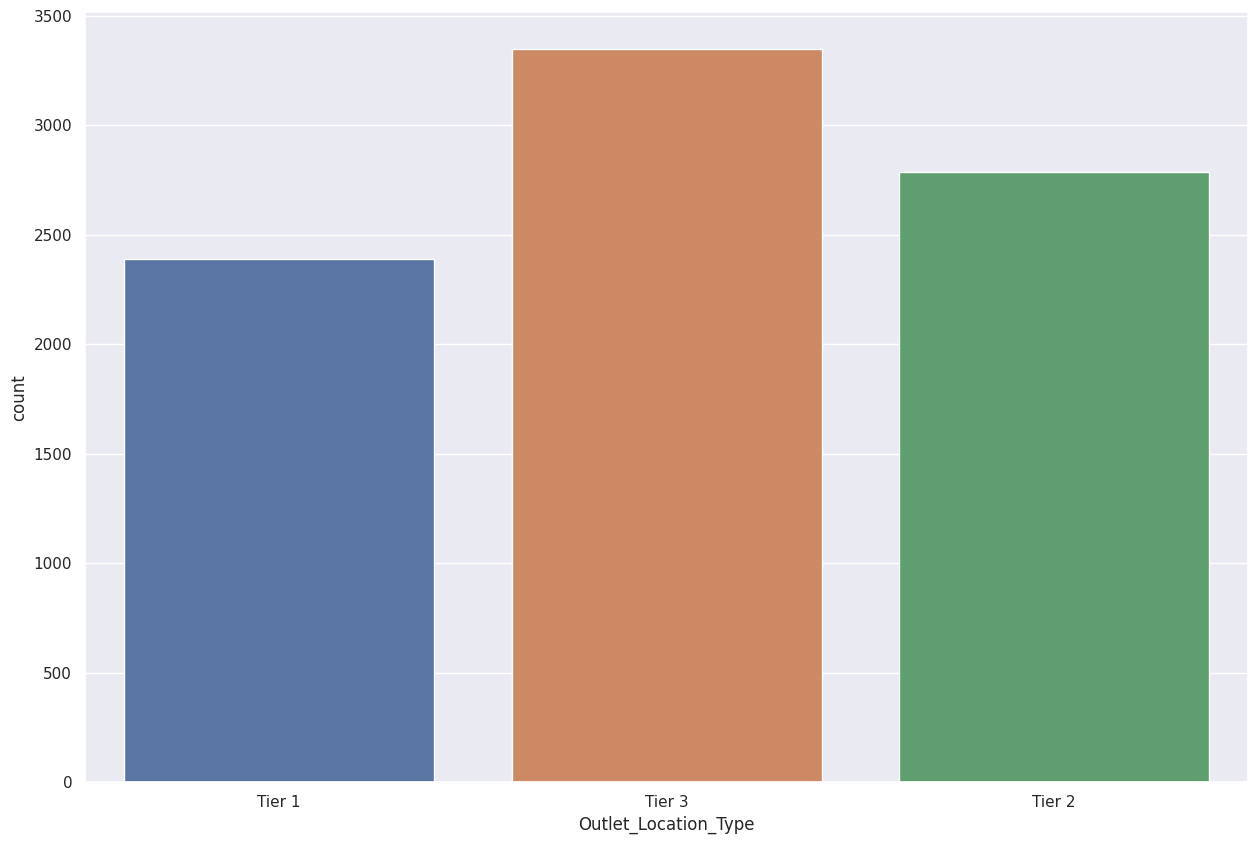

In [371]:
plt.figure(figsize=(15,10))
sns.countplot(x='Outlet_Location_Type',data=dataset)
plt.show()

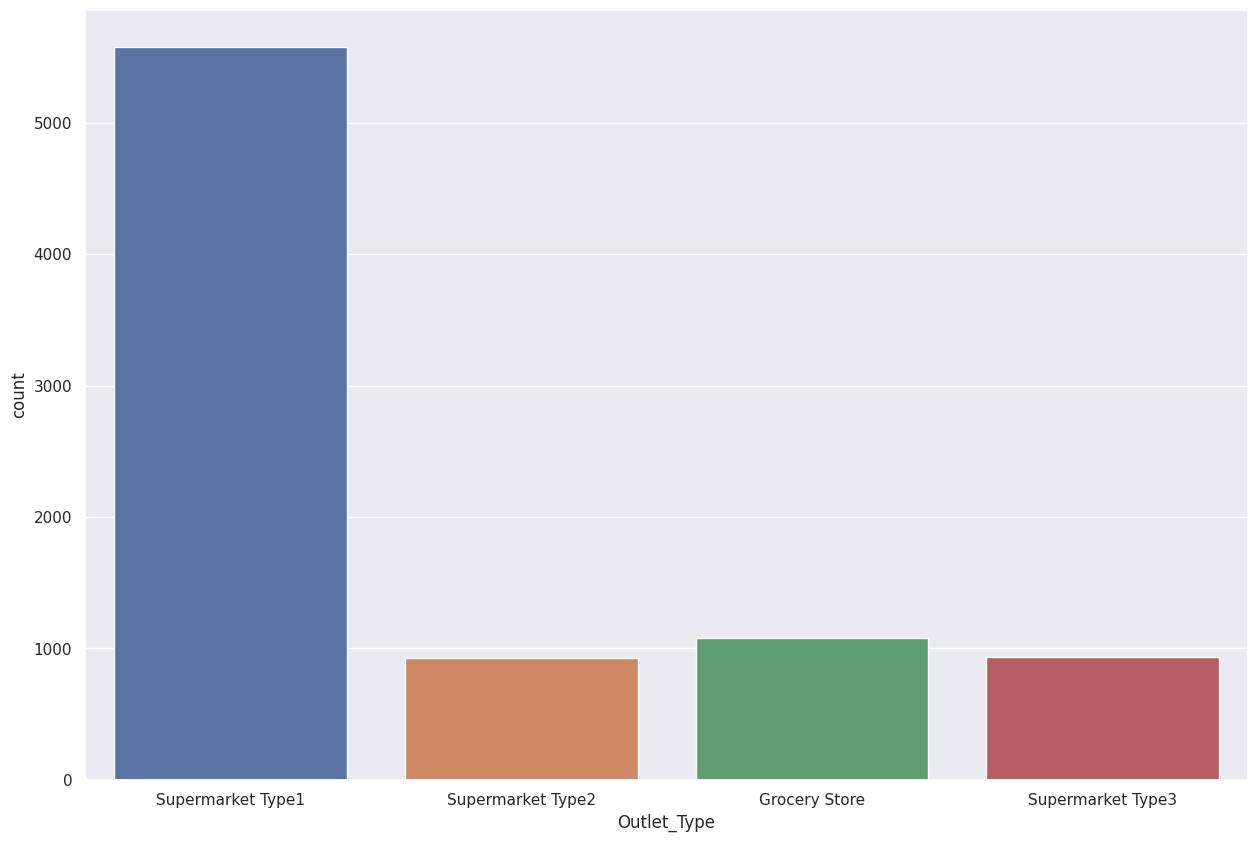

In [372]:
plt.figure(figsize=(15,10))
sns.countplot(x='Outlet_Type',data=dataset)
plt.show()

In [373]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [374]:
dataset['Item_Identifier']=encoder.fit_transform(dataset['Item_Identifier'])
dataset['Item_Fat_Content']=encoder.fit_transform(dataset['Item_Fat_Content'])
dataset['Item_Type']=encoder.fit_transform(dataset['Item_Type'])
dataset['Outlet_Identifier']=encoder.fit_transform(dataset['Outlet_Identifier'])
dataset['Outlet_Size']=encoder.fit_transform(dataset['Outlet_Size'])
dataset['Outlet_Location_Type']=encoder.fit_transform(dataset['Outlet_Location_Type'])
dataset['Outlet_Type']=encoder.fit_transform(dataset['Outlet_Type'])

In [375]:
  dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [376]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [377]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [378]:
from xgboost import XGBRegressor
regressor=XGBRegressor()

In [379]:
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [380]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1))),1)

[[2712.81]
 [1989.28]
 [ 831.96]
 ...
 [5020.13]
 [2266.38]
 [ 473.38]] 1


In [381]:

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.5609337806910826
